# Final Project - Exercise Posture Correction using Pose Estimation and Human Activity Recognition

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2023-2024
--- | ---
**Final Project** | **Exercise Posture Correction using Pose Estimation and Human Activity Recognition**
**Name** | Mendoza, Paulo
--- | ---
**Section** | CPE32S8
**Date Performed**: | April 9, 2024
**Date Submitted**: | April 9, 2024
**Instructor**: | Engr. Roman M. Richard


## Team 4 
Members:
- Mendoza, Paulo
- Labbao, Benedick

**Course:** CPE 313  
**Section:** CPE32S8


The project is all about Exercise Posture Correction using Pose Estimation and Human Activity Recognition. It consist of 2 parts the Pose Estimation and Human Activity Recognition. We are a team of two people and I am Paulo Mendoza and my part is the Pose Estimation. This notebook is only the Post Estimation part. This is the Documentation for the Post Estimation.

# Introduction

For the Post Estimation I will use ultralytics YOLOv8 = https://docs.ultralytics.com/

In [1]:
# installing ultralytics it is recommended to use a virtual environment
!pip install ultralytics

In [2]:
# importing YOLO = You Only Look Once
from ultralytics import YOLO

In [3]:
# this is a pretrained model for post estimation 
# more models for YOLOV8 can be found here https://docs.ultralytics.com/models/yolov8/#performance-metrics
# more models for YOLOV8 post estimation can be found here https://docs.ultralytics.com/tasks/pose/
model = YOLO('yolov8n-pose.pt') 

In [4]:
# Predict with the model
# predict on an image and with the save argument it will save it inside a folder with the skeletal overlay
results = model('https://ultralytics.com/images/bus.jpg', save=True)  


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 d:\datasci\datasciFinals\testingFinalProject\bus.jpg: 640x480 4 persons, 84.9ms
Speed: 3.0ms preprocess, 84.9ms inference, 841.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\pose\predict3


In [5]:
# sample image taken online
results = model('D:/datasci/datasciFinals/testingFinalProject/squatImage.png', save=True) 


image 1/1 D:\datasci\datasciFinals\testingFinalProject\squatImage.png: 640x640 1 person, 108.2ms
Speed: 4.0ms preprocess, 108.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\pose\predict3


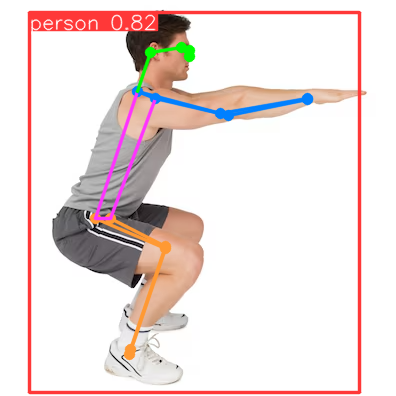

In [6]:
from IPython.display import Image

# Display the resulting image
Image(filename='D:/datasci/datasciFinals/testingFinalProject/runs/pose/predict/squatImage.png')

In [7]:
# more details about keypoints can be found here https://docs.ultralytics.com/modes/predict/#keypoints
# .xyn is normalized # xy is pixel coordinates
results[0].keypoints.xyn

tensor([[[0.4787, 0.1430],
         [0.4785, 0.1284],
         [0.4581, 0.1212],
         [0.0000, 0.0000],
         [0.3800, 0.1314],
         [0.3934, 0.2485],
         [0.3476, 0.2321],
         [0.5759, 0.2919],
         [0.5557, 0.2877],
         [0.7764, 0.2513],
         [0.7777, 0.2492],
         [0.2780, 0.5509],
         [0.2417, 0.5511],
         [0.4191, 0.6230],
         [0.4171, 0.6274],
         [0.3288, 0.8819],
         [0.3275, 0.8945]]])

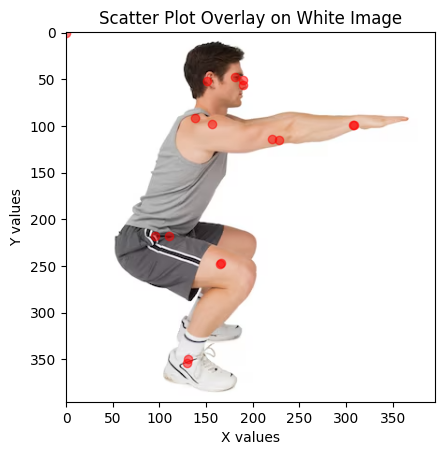

In [10]:
# Showing the image with the overlay keypoints
import matplotlib.pyplot as plt
import numpy as np

# Loading the result of the model (original image)
img_bgr = results[0].orig_img.astype(np.uint8)
# Convert BGR to RGB format
img_rgb = img_bgr[..., ::-1]
white_image = img_rgb  

# Showing the original image
plt.imshow(white_image)

# Loading the result of the model (keypoints xy)
data_tensor = results[0].keypoints.xy

# Extract x and y values from the tensor
x_values = data_tensor[:, :, 0].flatten().numpy()
y_values = data_tensor[:, :, 1].flatten().numpy()

# Showing the keypoints xy
# Red points with transparency
plt.scatter(x_values, y_values, c='red', alpha=0.5) 
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Overlay on Original Image')
plt.show()

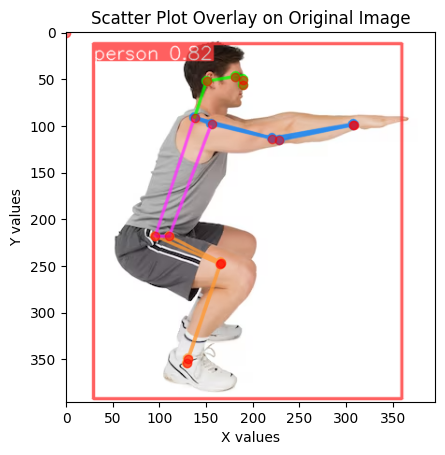

In [18]:
# Showing the image with the overlay keypoints
import matplotlib.pyplot as plt
import numpy as np

# Loading the result of the model (original image)
img_bgr = results[0].orig_img.astype(np.uint8)
# Convert BGR to RGB format
img_rgb = img_bgr[..., ::-1]
white_image = img_rgb  

# Showing the original image
plt.imshow(white_image)

# Loading the result of the model (keypoints xy)
data_tensor = results[0].keypoints.xy

# Extract x and y values from the tensor
x_values = data_tensor[:, :, 0].flatten().numpy()
y_values = data_tensor[:, :, 1].flatten().numpy()

# Showing the keypoints xy
# Red points with transparency
plt.scatter(x_values, y_values, c='red', alpha=0.5) 
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot Overlay on Original Image')

# Load and overlay PNG image
png_image = Image.open(r'D:\datasci\datasciFinals\testingFinalProject\runs\pose\predict\squatImage.png')  # Change path as needed
plt.imshow(png_image, alpha = 0.8 )

plt.show()